# İmport library, Load images and define display funk

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img,cmap=None):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

def display_two(img,res,cmap=None):
    fig = plt.figure(figsize=(18,6))
    ax = fig.add_subplot(121)
    ax.imshow(img,cmap=None)
    ax = fig.add_subplot(122)
    ax.imshow(res,cmap=None)
full = cv2.imread('test/StarMap.png')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

small= cv2.imread('test/Small_area.png')
small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)

small2 = cv2.imread('test/Small_area_rotated.png')
small2 = cv2.cvtColor(small2, cv2.COLOR_BGR2RGB)


Bad key "text.kerning_factor" on line 4 in
C:\Users\C\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# define a funk which is genereting all posibile image rotation and fliping

In [2]:
def generate_face(face2):
    list_face=[]
    face2_1=cv2.rotate(face2,cv2.ROTATE_90_CLOCKWISE)
    #face2_2=cv2.rotate(face2,cv2.ROTATE_180)                   resmi -1 yönünde flip edip 180 derece rotate yapinca yine orjinal hale geliyor
    face2_3=cv2.rotate(face2,cv2.ROTATE_90_COUNTERCLOCKWISE)
    list_face.append(face2)
    list_face.append(face2_1)
    #list_face.append(face2_2)
    list_face.append(face2_3)
    for i in range(-1,2):
        flip = cv2.flip(face2,i)
        face2_1=cv2.rotate(flip,cv2.ROTATE_90_CLOCKWISE)
        #face2_2=cv2.rotate(flip,cv2.ROTATE_180)
        face2_3=cv2.rotate(flip,cv2.ROTATE_90_COUNTERCLOCKWISE)
        list_face.append(flip)
        list_face.append(face2_1)
        #list_face.append(face2_2)
        list_face.append(face2_3)
    return list_face

# use template_matching algoritym and return a list which is include matching points

In [3]:
def find_star_template_match(small,full):
    small_list = generate_face(small)
    for f in small_list:
        height, width,channels = f.shape
        methods = ['cv2.TM_SQDIFF','cv2.TM_CCOEFF']
        points = []
        for m in methods:
            full_copy = full.copy()
            method = eval(m)
            res = cv2.matchTemplate(full_copy,f,method)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

            # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
            if method in [cv2.TM_SQDIFF]:
                top_left = min_loc    
            else:
                top_left = max_loc

            bottom_right = (top_left[0] + width, top_left[1] + height)
            points.append([top_left, bottom_right])

        if(points[0]==points[1]):
            other_point = [points[0][0],points[0][1],(points[0][0][0]+height,points[0][0][1]),(points[0][0][0],points[0][0][1]+width)]
            
            print("\n matching points: \n",other_point,"\n\n")
            cv2.rectangle(full_copy,points[0][0], points[0][1], 255, 5)
            display_two(res,full_copy)

# define a funk use Flann and Knn

In [4]:
def find_star_with_flann(small,full):
    sift = cv2.xfeatures2d.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(small,None)
    kp2, des2 = sift.detectAndCompute(full,None)

    # FLANN parameters (Fast Library Aproximetly Nearest Neighborhs)
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)  
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    good = []
    # ratio test
    for i,(match1,match2) in enumerate(matches):
        if match1.distance < 0.6*match2.distance:
            good.append([match1])

    if len(good)==0:
        print("There is a no match")
        
    else:
        flann_matches = cv2.drawMatchesKnn(small,kp1,full,kp2,good,None,flags=0)
        display(flann_matches)
        find_star_template_match(small,full)   


 matching points: 
 [(855, 150), (969, 264), (969, 150), (855, 264)] 




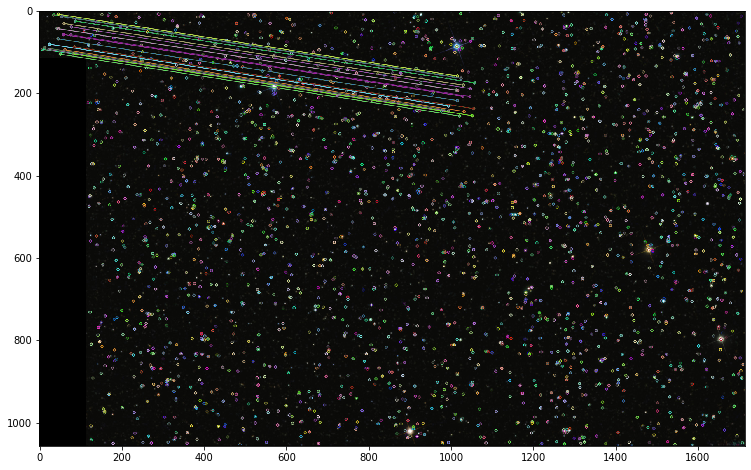

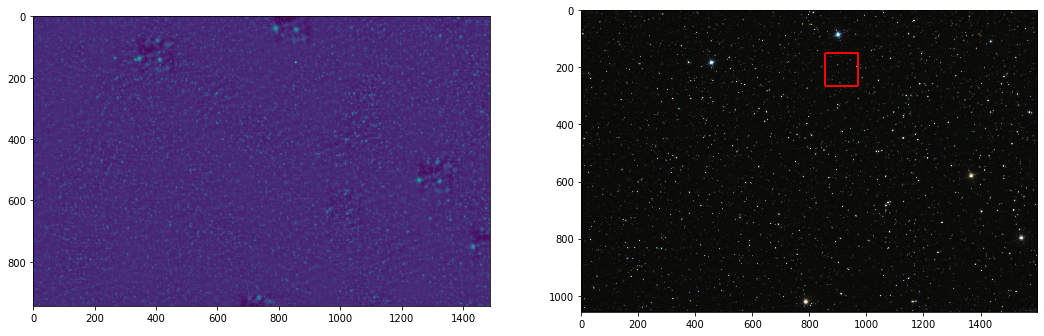

In [5]:
find_star_with_flann(small,full)

## incase all posible flip simetry we find match


 matching points: 
 [(855, 150), (969, 264), (969, 150), (855, 264)] 




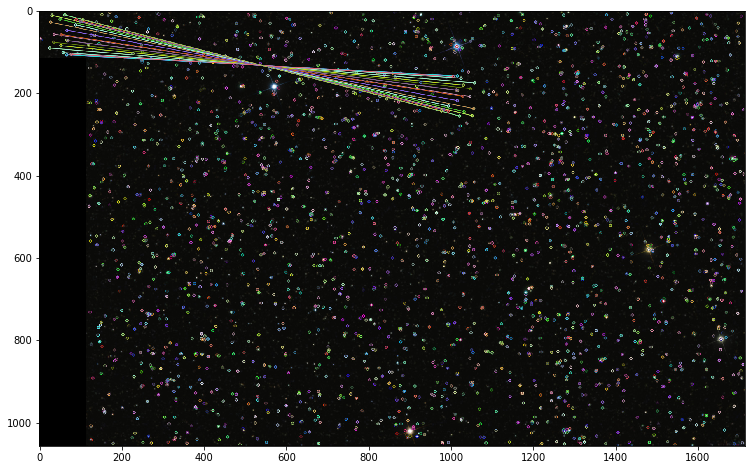

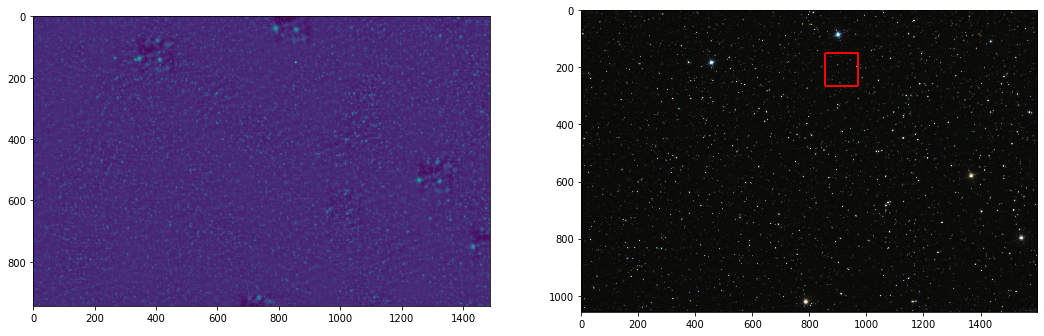

In [6]:
small_flip = cv2.flip(small,-1)
find_star_with_flann(small_flip,full)

## incase all posible rotation  we find match


 matching points: 
 [(855, 150), (969, 264), (969, 150), (855, 264)] 




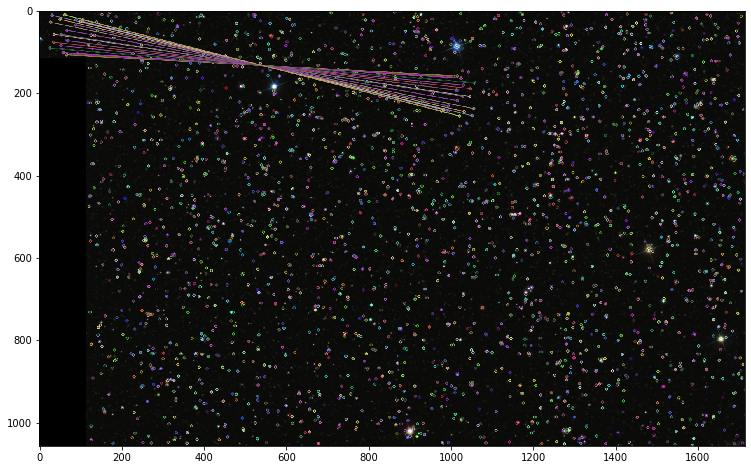

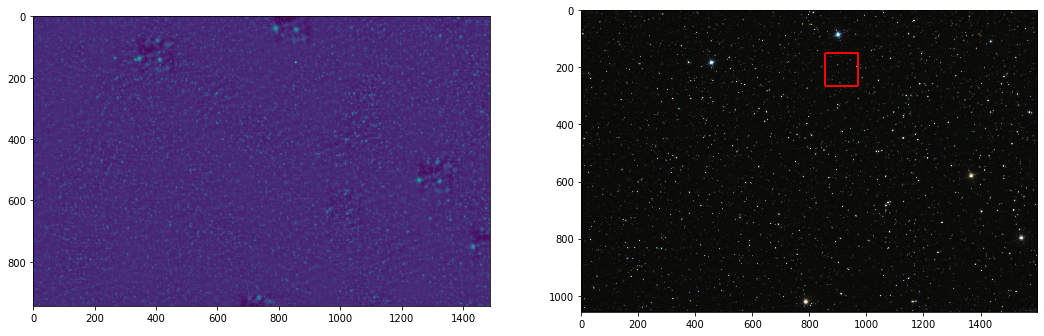

In [7]:
small_rotate=cv2.rotate(small,cv2.ROTATE_180)
find_star_with_flann(small_rotate,full)

## resize case 
## we can optimize our value and varible

In [8]:
small_resize=cv2.resize(small,(int(small.shape[0]*0.9),int(small.shape[1]*0.9)))
small_resize.shape

(102, 102, 3)

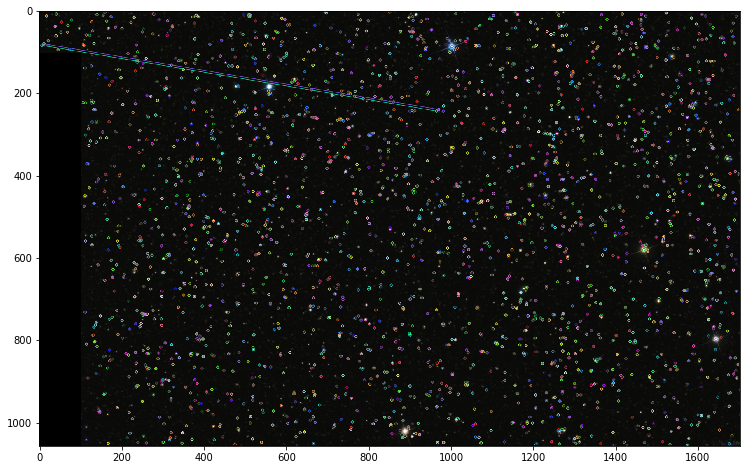

In [9]:
find_star_with_flann(small_resize,full)

# now we look second small image 
## we didnt find any match

In [10]:
find_star_with_flann(small2,full)

There is a no match


In [11]:
small2_resize=cv2.resize(small2,(int(small2.shape[0]*0.8),int(small2.shape[1]*0.8)))
small2_resize.shape

(123, 123, 3)

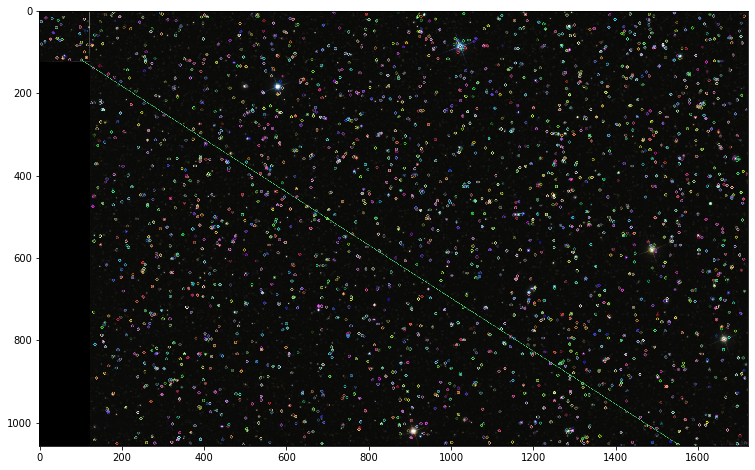

In [12]:
find_star_with_flann(small2_resize,full)